# Week three

## Part 1: Small world networks

- ** What's the problem with random networks as a model for real-world networks according to the argument on p. 11-12 in the .pdf (near the end of section 3.5 for those of you reading the web-version)? **
    - The poission form significantly underestimate the number of high degree nodes. The spread in the degrees of rela networks is much wider than expected in a random network. The degree distribution of random networks lack clear outliers and in a large random network the degree of most nodes is in the narrow vicinity of <k>

- ** List the four regimes that characterize random networks as a function of ⟨k⟩⟨k⟩. *
    - *Subcritical Regime* p < 1/N. In the subcritical regime the network consists of numerous tiny components, whose size follows the exponential distribution. Hence these components have comparable sizes, lacking a clear winner that we could designate as a giant component
    - *Critical point: * p = 1/N. The critical point separates the regime where there is not yet a giant component (<k> < 1) from the regime where ther is one (<k> > 1) .At the critical point most nodes are located in numerous small components, whose size distribution follows 3.36. The power law form indicates that components of rather different sizes coexist. Thes numerous small components are mainly trees, while the giant component may contain loops. 
    - *Supercritical point* p > 1/N .This regime is most relevance to real systems, as for the first time we have a giant component that looks like a network. In the supercritical regime numerous isolated components coexist with the giant component, their size distribution following 3.35. These small components are tress, while the giant component contains loops and cycles. The supercritical regime lasts until all nodes are absorbed by the giant component. 
    - *Connected regime :* p > ln N / N. For sufficiently large p the giant component absorbs all nodes and components, hence N_G = N. In the absence of isolated nodes the network becomes connected. Here the average degree is <k> = lnN.  The random network model predicts that the emergence  of a network is not a smooth, gradual process. The isolated nodes and tiny components observed for small <k> collapse into a giant component through a phase transition.
    - *Notes:* Once <k> exceeds a critical value, N_G/N increases, signaling the rapid emergence of a large cluster t>hat we call the giant component. We have giant component if and only if each node has on average more than one link <k>. P_c = 1/N therefore the larger a network, the smaller p is sufficient for the giant component. 
   

- **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?** 
    - Because in a random network the local clustering coefficient is independent on the node´s degree and <C> only depends on the system size as 1/N . 

### Exercise Ws edition 

In [ ]:
# let´s create the graph
import networkx as nx
import matplotlib.pyplot as plt
from __future__ import division

n = 500
k = 4

G_nx1 = nx.watts_strogatz_graph(n,k,0)
G_nx2 = nx.watts_strogatz_graph(n,k,0.1)
G_nx3 = nx.watts_strogatz_graph(n,k,0.5)
G_nx4 = nx.watts_strogatz_graph(n,k,1)
G_nx5 = nx.watts_strogatz_graph(n,k,2)

G_random = nx.erdos_renyi_graph(500,1)

print("The average shortest path with rewiring probability of {} is {}".format(0,nx.average_shortest_path_length(G_nx1)))
print("The average shortest path with rewiring probability of {} is {}".format(0.1,nx.average_shortest_path_length(G_nx2)))
print("The average shortest path with rewiring probability of {} is {}".format(0.5,nx.average_shortest_path_length(G_nx3)))
print("The average shortest path with rewiring probability of {} is {}".format(1,nx.average_shortest_path_length(G_nx4)))
print("The average shortest path with rewiring probability of {} is {}".format(2,nx.average_shortest_path_length(G_nx4)))


**Describe what happens to the network when p=1.**
    - One of the characteristic of a random network model is that it contains low average path lenght, meaning that there tends to be a path between a pair of nodes that involves only a few edges. This is called the small world problem and the average distance in such a network can be described by the following formula <d> = ln(N)/ln(k), where k is the average degree of the network and N is the number of nodes in the network. In a Watts storgatz p stands for the probability that an edge is rewired, meaning that the edge is disconnected from one of its nodes and randomly connected to another node anywhere in the network. Each edge is chosen to be rewired independent with probability p. 
    
    So when the probability is low then most connections are still in the original form, therefore they connect to the original local connections, they connect nodes that are nearby in the lattice. But some of the rewired edges might turn into long distance connections that connects nodes that are far away from each other, therefore lowering the average path length. These paths are called shortcuts and they lower the overall average path lenght of the network, so when P increases more and more rewiring happens. When P = 1 then all of the edges are rewired and we end up with a random network. Like we have mentioned earlier one of the characteristic of randum network is that the average path length can be described with this formula <d> = ln(N)/ln<k>. Calculating this for our network of N = 500 and k = 4 gives the average distance of 4.483. Like you can see here above the average shortest path decreases with increasing p and when p = 1 then the average distance is quite close to the theoretical value for a random network.
    
    info taken from this website [here](http://mathinsight.org/small_world_network)

### The behavior investigation

Let's investigate this behavior in detail. Generate 50 networks with N=500N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}p={0,0.01,0.03,0.05,0.1,0.2}. Calculate the average of ⟨d⟩as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).

In [2]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

N = 500
k = 4
p_values = [0,0.01,0.03,0.05,0.1,0.2]

networks = collections.defaultdict(list)
avgs = collections.defaultdict(float)
stds = collections.defaultdict(float)

# creating a list that contains 50 networks for each p
# calculating the average distance for each network
# calculatin the std of the average distance 
for i,p in enumerate(p_values):
    # Use list comprehension to create 50 instances of the network
    networks[i] = [nx.watts_strogatz_graph(n,k,p) for j in range(50)]
    average_d = [nx.average_shortest_path_length(network) for network in networks[i]]
    avgs[i] = np.mean(average_d) 
    stds[i] = np.std(average_d)

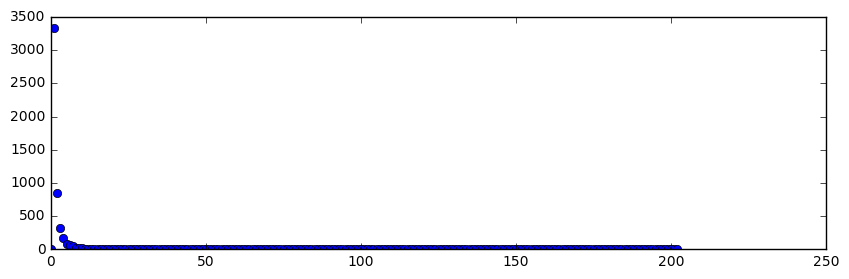

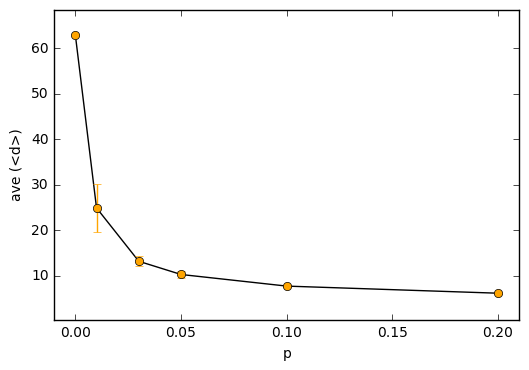

In [6]:
plt.figure()
plt.plot(p_values, avgs.values(),color="black")
plt.errorbar(p_values, avgs.values(), xerr=0, yerr=stds.values(), fmt="o", color="orange")
plt.ylabel('ave (<d>)')
plt.xlabel('p')
plt.margins(0.05,0.10)
plt.show()

## Part 2: Scale-free networks, the Barabasi-Albert Model

**What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 5.7 to answer this one).**
 - TODO svara þessu

**What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
- TODO svara þessu

### Let's create our own Barabasi-Albert model (a special case)

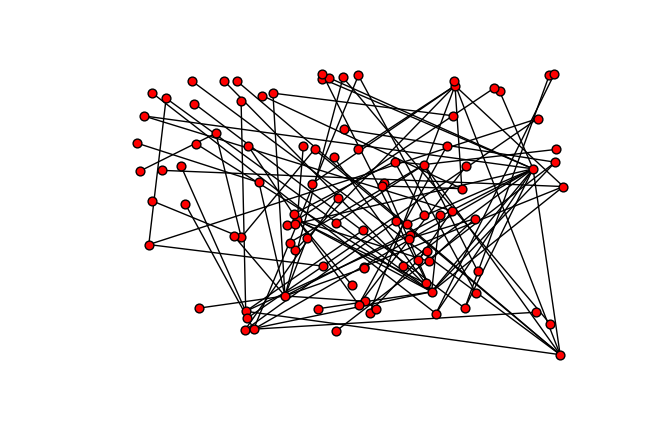

The minimum degree of the network is: 1
The maximum degree of the network is: 89


In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create barabasi Albert network
G = nx.Graph()
# adding first notes and one edge
G.add_node(1)
G.add_node(2)
G.add_edge(1,2)


def barabasi_add_node(graph,nodeid):
    # get all edges and flaten the list of edges out (remove connection information)
    # then we use np.random.choice to choose one node out of the list
    node = np.random.choice([node for edge in graph.edges() for node in edge])

    # Create a node from the newly created note to the chosen note
    graph.add_edge(nodeid,node)

# we then add nodes incrementivally until we reach 100 nodes and in each time a node is added, 
#   the node is connected to one of the existing nodes in proportion to their degree (see page 8 chapter 5)
for i in range(3,101):
    barabasi_add_node(G,i)

# plot the network
nx.draw_random(G,node_size = 40, with_labels = False)
plt.show()

# Now we add more nodes until we reach total of 500 nodes
for i in range(101,5001):
    barabasi_add_node(G,i)

# Find the maximum and minimum degree of the network
print "The minimum degree of the network is: {}".format(min(G.degree().values()))
print "The maximum degree of the network is: {}".format(max(G.degree().values()))


# bin the degree distribution using np.histogram
#   I used nx.degree_histogram to bin the values
#values, bins = np.histogram(G.degree().values(), bins=max(G.degree().values()))
values = nx.degree_histogram(G)

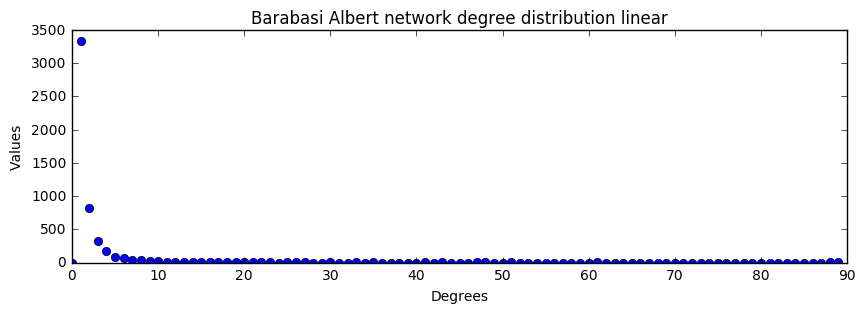

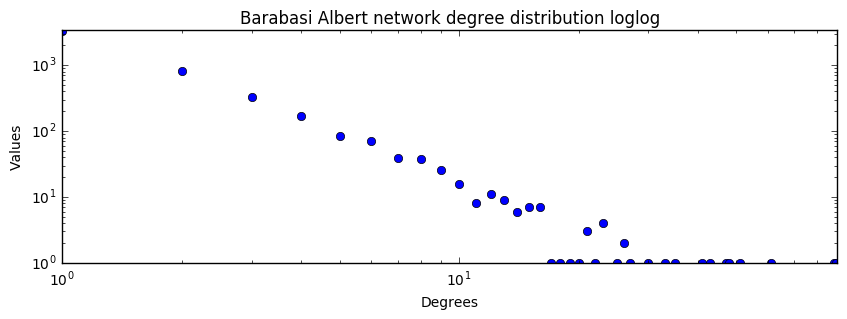

In [30]:
# Plot the distribution, both linear and log-log axes

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(range(0,len(values)), values,'o')
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("Barabasi Albert network degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(range(0,len(values)), values,'o')
plt.margins(0.01,0.01)
plt.xscale('log')
plt.yscale('log')
plt.title("Barabasi Albert network degree distribution loglog")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

### Friendship paradox

This paradox states that almost everyone have fewer friends than their friends have, on average*. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated.

In [31]:
friendship_paradox = []

for i in range(0,1000):

    # Pick a node i at random
    node1 = np.random.choice(G.nodes())
    node1_degree = G.degree(node1)

    # Find node's neighbors
    neighbors = G.neighbors(node1)
    neighbors_avg_degree = np.mean([G.degree(neighbor) for neighbor in G.neighbors(1648)])

    #print "The degree of the node chosen randomly {}".format(node1_degree)
    #print "The nodes neighbor's average degree {}".format(np.mean([G.degree(neighbor) for neighbor in G.neighbors(1648)]))

    if neighbors_avg_degree > node1_degree:
        friendship_paradox.append(1)
    else:
        friendship_paradox.append(0)
        
print "The friendship paradox is true in {} times out of 1000, therefore:".format(sum(friendship_paradox))

if sum(friendship_paradox) > 500:
    print "The friendship paradox hold"
else:
    print "The friendship paradox does not hold"

The friendship paradox is true in 883 times out of 1000, therefore:
The friendship paradox hold


**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.**

Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

In [32]:
import matplotlib.pyplot as plt

# Create Barabasi Albert model with growth mechanism but without preferential attachment
G_barabasi = nx.Graph()
# adding first notes and one edge
G_barabasi.add_node(1)
G_barabasi.add_node(2)
G_barabasi.add_edge(1,2)


def barbasi_without_preferential_add_node(graph,nodeid):
    # We use np.random.choice to choose one node out of the list
    node = np.random.choice(graph.nodes())

    # Create a node from the newly created note to the chosen note
    graph.add_edge(nodeid,node)

# Create 5000 - 2 nodes
for i in range(2,5001):
    barbasi_without_preferential_add_node(G_barabasi,i)


In [33]:
from __future__ import division
# Create ER network of same size and degree

barbasi_k = np.mean(G_barabasi.degree().values())
# calculate p based on the average degree of the barbasi
# p = k / (n-1)
N = 5000
p =  barbasi_k / (N - 1)   
G_er = nx.erdos_renyi_graph(N,p)

** Compare the ER network with the Barbasi network without preferential attachment. What are the difference**

The min and max degree of the Barabasi network is: 1 12
The min and max degree of the Er network is: 0 9 

The number of compnents in the Barbasi network is: 1
The number of compnents in the ER network is: 822


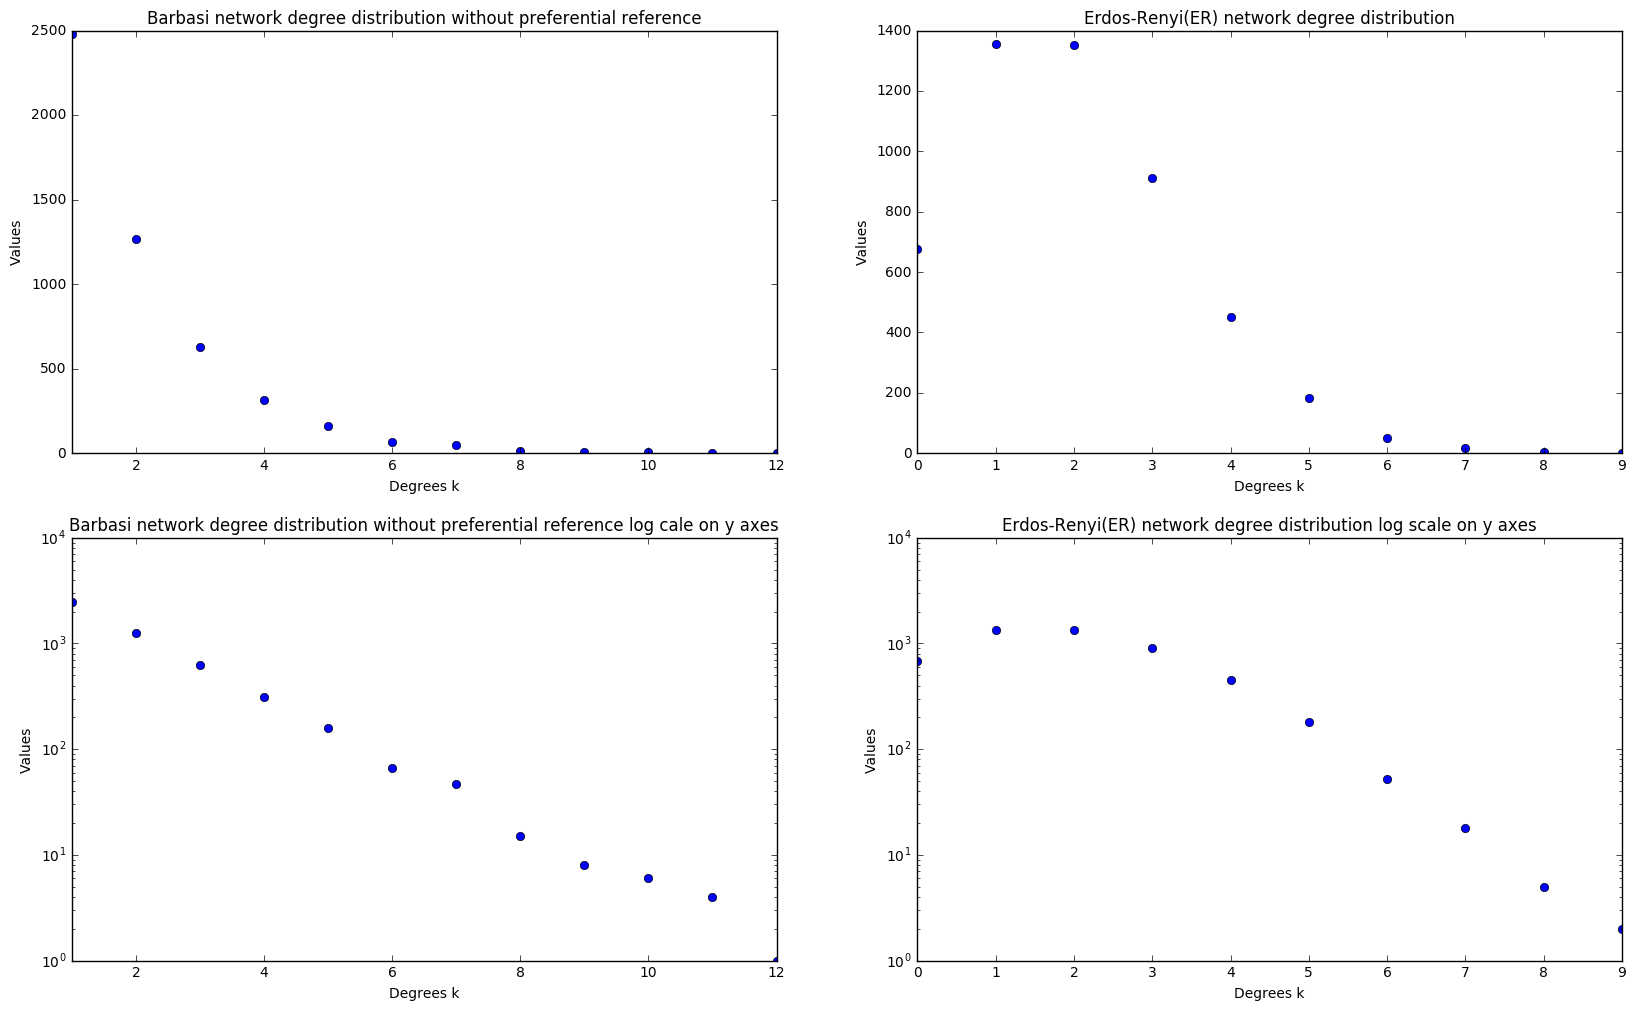

In [64]:
%matplotlib inline

from __future__ import division
import collections

# let's start the comparison by plotting up the degree distribution for both networks

# Extract the average degree
er_degree = G_er.degree().values()
barbasi_degree = G_barabasi.degree().values()

er_degree_dist = { "bin_edges" : [], "values" : [] }
barbasi_degree_dist = { "bin_edges" : [], "values" : [] }

# Let´s bin these integer numbers from max to min, where each integer value gets its own bin
for number, value in collections.Counter(er_degree).items():
    er_degree_dist["bin_edges"].append(number)
    er_degree_dist["values"].append(value)
for number, value in collections.Counter(barbasi_degree).items():
    barbasi_degree_dist["bin_edges"].append(number)
    barbasi_degree_dist["values"].append(value)  
    
    
plt.figure(num=None, figsize=(20,12), dpi=80, facecolor="w", edgecolor="k")    
    
plt.subplot(2,2,1)  
#plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.plot(barbasi_degree_dist["bin_edges"], barbasi_degree_dist["values"],'o')
plt.xlim(min(barbasi_degree_dist["bin_edges"]), max(barbasi_degree_dist["bin_edges"]))
plt.title("Barbasi network degree distribution without preferential reference")
plt.xlabel("Degrees k")
plt.ylabel("Values")


plt.subplot(2,2,2)    
#plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.plot(er_degree_dist["bin_edges"], er_degree_dist["values"],'o')
plt.xlim(min(er_degree_dist["bin_edges"]), max(er_degree_dist["bin_edges"]))
plt.title("Erdos-Renyi(ER) network degree distribution")
plt.xlabel("Degrees k")
plt.ylabel("Values")

plt.subplot(2,2,3)  
#plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.yscale('log')
plt.plot(barbasi_degree_dist["bin_edges"], barbasi_degree_dist["values"], 'o')
plt.xlim(min(barbasi_degree_dist["bin_edges"]), max(barbasi_degree_dist["bin_edges"]))
plt.title("Barbasi network degree distribution without preferential reference log cale on y axes")
plt.xlabel("Degrees k")
plt.ylabel("Values")

plt.subplot(2,2,4)    
#plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.yscale('log')
plt.plot(er_degree_dist["bin_edges"], er_degree_dist["values"],'o')
plt.xlim(min(er_degree_dist["bin_edges"]), max(er_degree_dist["bin_edges"]))
plt.title("Erdos-Renyi(ER) network degree distribution log scale on y axes")
plt.xlabel("Degrees k")
plt.ylabel("Values")



# Check out the min and max degrees
# Find the maximum and minimum degree of the network
print "The min and max degree of the Barabasi network is: {} {}".format(
    min(G_barabasi.degree().values()),
    max(G_barabasi.degree().values())
)

print "The min and max degree of the Er network is: {} {} \n".format(
    min(G_er.degree().values()),
    max(G_er.degree().values())
)

# Check out the number of connected components in the networks
print "The number of compnents in the Barbasi network is: {}".format(
    nx.number_connected_components(G_barabasi)
)

print "The number of compnents in the ER network is: {}".format(
    nx.number_connected_components(G_er)
)

When we eliminate the preferntial attachement then a new nodes choose randomly the nodes they link to. We can see from the images of the Barbasi Albert network that the lack of preferential attachment results in a degree distribution  that follows an exponential. An exponential funciton decays much fastar than a power law, hence it doesn not support hubs. Therefore by eliminating the preferential attachment we are also eliminating the network´s scale free character and the hubs. As all nodes acquire links with equal probability, we lack a rich-get-richer process and no clear winner can emerge. 

So in a way it becomes similar to Er network in a way that there are no real outliers in the degree distribution (no hubs) and the variance of the degree distribution is relatively small.  However the degree distribution of ER follows Poission distribution not exponential so the two distributions are not the same, which is illustrated in the plots here above.

The difference in the number of components is huge in these networks, this difference is understandable when the creation of the network is investigated. A random network consists of N nodes where each node pair is connected with probability p. So it is trivial to see that if each node pair is connected with probability p then the network will consist of many subgraphs that are not connected and the number of connected components depends highly of p. In our example the network only contains 500 edges and p is a really low number (P = 0.00040000000000000002, nr of components = 822), therefore the number of components is huge (alot of isolated nodes). The barbasi network on the other hand still has the growth mechanism which connects each node to a node chosen randomly. Therefore each note is connected to the gient component and we end up with a network that consist of one graph. Therefore the number of connected components is 1, meaning that there exist a path from every node to all other nodes.

** Notes **

** Connected components: ** In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph

In [59]:
nx.number_connected_components(G_barabasi)

1

In [61]:
nx.number_connected_components(G_er)

822

In [65]:
p

0.00040000000000000002